<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>
<h1 align="center"> Activation Functions </h1><br>
Activation functions are a cornerstone of Machine Learning. In general, Activation Functions define how a processing unit will treat its input -- usually passing this input through it and generating an output through its result. To
begin the process of having a more intuitive understanding, let's go through some of the most commonly used functions.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>This lesson covers the following concepts of Activation Functions:</strong></font>
<br>
- <p><a href="#ref1">The Step Functions</a></p>
- <p><a href="#ref2">The Sigmoid Functions</a></p>
- <p><a href="#ref3">The Linear Unit Functions</a></p>
- <p><a href="#ref3">Activation Functions in TensorFlow</a></p>
<p></p>
</div>
<br>

---

#### Importing Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

The next cell implements a basic function that plots a surface for an arbitrary activation function. The plot is done for all possible values of weight and bias between -0.5 and 0.5 with a step of 0.05. The input, the weight, and the bias are one-dimensional. Additionally, the input can be passed as an argument.

In [2]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

#### Basic Structure

In this example we illustrate how, in Tensorflow, to compute the weighted sum that goes into the neuron and direct it to the activation function. For further details, read the code comments below.

In [3]:
#start a session
sess = tf.Session();
#create a simple input of 3 real values
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])
#create a matrix of weights
w = tf.random_normal(shape=[3, 3])
#create a vector of biases
b = tf.random_normal(shape=[1, 3])
#dummy activation function
def func(x): return x
#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor.
act = func(tf.matmul(i, w) + b)
#Evaluate the tensor to a numpy array
act.eval(session=sess)

array([[ 0.19079694, -5.1507306 , -0.9498685 ]], dtype=float32)

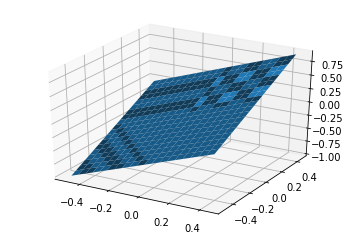

In [4]:
plot_act(1.0, func)

<a href="#ref1"></a>
## The Step Functions
The Step function was the first one designed for Machine Learning algorithms. It consists of a simple threshold function that varies the Y value from 0 to 1. This function has been historically utilized for classification problems, like Logistic Regression with two classes.

<img width="250" alt="Activation binary step" src="https://ibm.box.com/shared/static/kqect7hdbnpzb6ylnauimr1uxmx5634k.png">

The Step Function simply functions as a limiter. Every input that goes through this function will be applied to gets either assigned a value of 0 or 1. As such, it is easy to see how it can be handy in classification problems.

There are other variations of the Step Function such as the Rectangle Step and others, but those are seldom used.

Tensorflow dosen't have a Step Function.

<a href="#ref2"></a>
## The Sigmoid Functions
The next in line for Machine Learning problems is the family of the ever-present Sigmoid functions. Sigmoid functions are called that due to their shape in the Cartesian plane, which resembles an "S" shape.

Sigmoid functions are very useful in the sense that they "squash" their given inputs into a bounded interval. This is exceptionally handy when combining these functions with others such as the Step function.

Most of the Sigmoid functions you should find in applications will be the Logistic, Arctangent, and Hyperbolic Tangent functions.

#### Logistic Regression (sigmoid)

The Logistic function, as its name implies, is widely used in Logistic Regression. It is defined as $f(x) = \dfrac{1}{1 + e^{-x}}$. Effectively, this makes it so you have a Sigmoid over the $(0,1)$ interval, like so:

<img width="384" alt="Activation - Binary Step" src="https://ibm.box.com/shared/static/eryl0bvmczgfzemarakzgvgvgwe0c135.png">

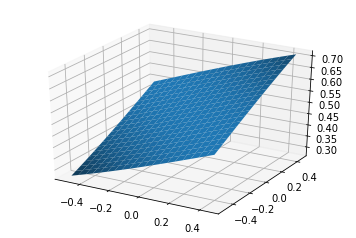

In [5]:
plot_act(1, tf.sigmoid)

3D sigmoid plot. The x-axis is the weight, the y-axis is the bias.

#### Using sigmoid in a neural net layer ####

In [6]:
act = tf.sigmoid(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[0.887265  , 0.00378033, 0.05284549]], dtype=float32)

The Arctangent and Hyperbolic Tangent functions on the other hand, as the name implies, are based on the Tangent function. Arctangent is defined by $f(x) = tan^{-1}x$, and produces a sigmoid over the $(\dfrac{-\pi}{2},\dfrac{\pi}{2})$ interval.

<img width="384" alt="Activation - Atan" src="https://ibm.box.com/shared/static/ajw9xtnsux7hc4fi5pghatwak425xk7f.png">

It has no implementation in Tensorflow

#### Tanh

The Hyperbolic Tangent, or TanH as it's usually called, is defined as $f(x) = \dfrac{2}{1 + e^{-2x}} - 1$. It produces a sigmoid over the $(-1,1)$ interval. TanH is widely used in a wide range of applications, and is probably the most used function of the Sigmoid family.

<img width="384" alt="Activation - TanH" src="https://ibm.box.com/shared/static/ylr2so4fnhwszxnw9hfmar9rphy4qlpn.png">

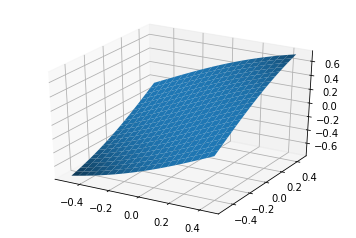

In [7]:
plot_act(1, tf.tanh)

3D tanh plot. The x-axis is the weight, the y-axis is the bias.

#### Using tanh in a neural net layer ####

In [ ]:
act = tf.tanh(tf.matmul(i, w) + b)
act.eval(session=sess)

<a href="#ref3"></a>
## The Linear Unit functions
Linear Units are the next step in activation functions. They take concepts from both Step and Sigmoid functions and behave within the best of the two types of functions. Linear Units in general tend to be variation of what is called the Rectified Linear Unit, or ReLU for short.

The ReLU is a simple function which operates within the $[0,\infty)$ interval. For the entirety of the negative value domain, it returns a value of 0, while on the positive value domain, it returns $x$ for any $f(x)$.

<img width="384" alt="Activation - ReLU" src="https://ibm.box.com/shared/static/kblfxapmiioh20q6vmtd6qu579w689nz.png">

While it may seem counterintuitive to utilize a pseudo-linear function instead of something like Sigmoids, ReLUs provide some benefits which might not be understood at first glance. For example, during the initialization process of a Neural Network model, in which weights are distributed at random for each unit, ReLUs will only activate approximately only in 50% of the times -- which saves some processing power. Additionally, the ReLU structure takes care of what is called the **Vanishing and Exploding Gradient** problem by itself. Another benefit -- if not only marginally relevant to us -- is that this kind of activation function is directly relatable to the nervous system analogy of Neural Networks (this is called *Biological Plausibility*).

The ReLU structure has also has many variations optimized for certain applications, but those are implemented on a case-by-case basis and therefore aren't in the scope of this notebook. If you want to know more, search for *Parametric Rectified Linear Units* or maybe *Exponential Linear Units*.

In [ ]:
plot_act(1, tf.nn.relu)

3D relu plot. The x-axis is the weight, the y-axis is the bias.

#### Using relu in a neural net layer ####

TensorFlow has ReLU and some other variants of this function. Take a look:

In [ ]:
act = tf.nn.relu(tf.matmul(i, w) + b)
act.eval(session=sess)

---

This is the end of the **Activation Functions** notebook. Hopefully, now you have a deeper understanding of what activation functions are and what they are used for. Thank you for reading this notebook, and good luck on your studies.
 You can take a look at all TensorFlow Activation Functions in [its reference](https://www.tensorflow.org/versions/r0.9/api_docs/python/nn.html#activation-functions).

---

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this module!

Created by Walter Gomes de Amorim, Thiago Felipe Correa Borges and Hugo Sales Correa